<a href="https://colab.research.google.com/github/Sergey-Dubinin/Data-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from plotly import graph_objects as go

In [135]:
netflix = pd.read_csv('/content/netflix_titles.csv') # Считываем Dataset.

In [136]:
netflix.head(5) # Посмотрим на первые пять строк таблицы.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [137]:
netflix.info() # Смотрим сводную информацию по таблице(пропуски, типы объектов)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [138]:
"""Тип столбца date_added: object, сменим его на Datetime64 """
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [139]:
""" Dataset должен состоять из двух видов видео: фильмы и сериалы.
    Проверим так ли это.
"""
netflix['type'].unique() 

array(['Movie', 'TV Show'], dtype=object)

> Сначало проведем анализ всей таблици, а потом фильмов и сариалов отдельно.



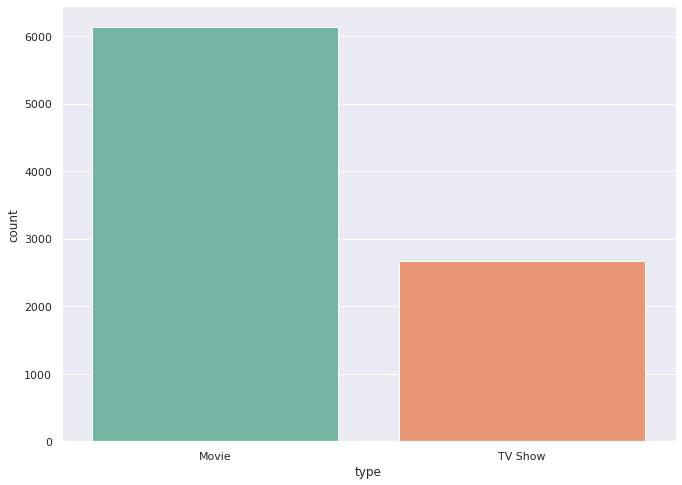

In [140]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

Как видно количество фильмов загружено на Netflix больше в два раза, чем сериалов.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


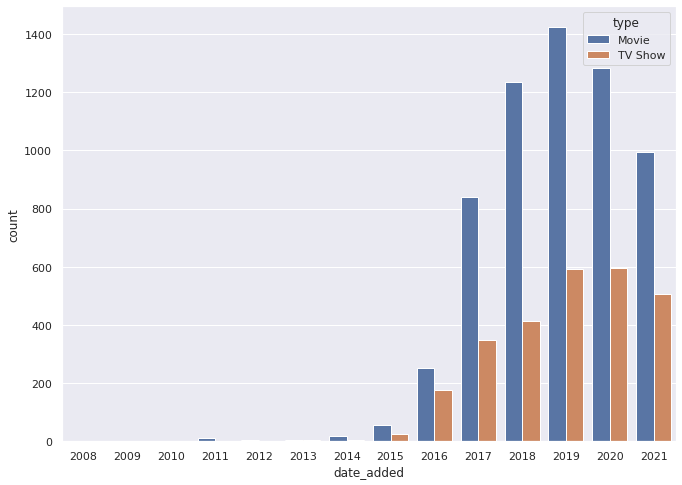

In [143]:
"""Посмотрим на динамику добавление фильмов и сериалов на Netflix"""

year_of_addition = netflix[['date_added', 'type']]
year_of_addition['date_added'] = year_of_addition['date_added'].dt.year

if year_of_addition['date_added'].isna().any():
    year_of_addition.dropna(subset=['date_added'], inplace=True)

year_of_addition = year_of_addition.astype({'date_added': 'int'})
year_of_addition

# fig = plt.Figure(figsize=(7, 7))
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x='date_added', hue='type', data=year_of_addition, )

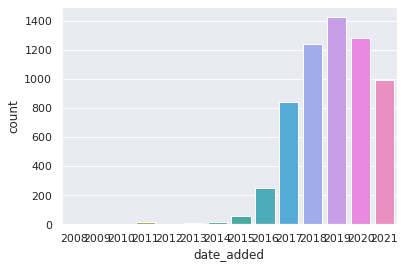

In [88]:
sns.countplot(x='date_added', data=movie_time)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11


In [16]:
netflix_movie = netflix[netflix['type'] == 'Movie'].copy()
netflix_TVShow = netflix[netflix['type'] == 'TV Show'].copy()

In [ ]:
netflix_TVShow_vc = netflix_TVShow['duration'].value_counts()
netflix_TVShow_vc

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [ ]:
netflix_movie_vc = netflix_movie['duration'].value_counts()
netflix_movie_vc

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
ind = netflix_movie[netflix_movie['duration'].isna()].index
netflix_movie[netflix_movie['duration'].isna()]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
netflix_movie.dropna(subset=['duration'], inplace=True)
netflix_movie['duration'].isna().sum()

In [ ]:
def from_object_in_int(duration):
    if type(duration) == str:
        return int(duration.split(sep=' ')[0])
    return duration


netflix_movie['duration'] = netflix_movie['duration'].apply(from_object_in_int)
netflix_movie

In [ ]:
netflix_movie_vc = netflix_movie['duration'].value_counts().sort_index()
netflix_movie_vc

3      1
5      1
8      1
9      1
10     1
      ..
233    1
237    1
253    1
273    1
312    1
Name: duration, Length: 205, dtype: int64

In [ ]:
fig = go.Figure( [go.Bar(x=netflix_TVShow_vc.index, y=netflix_TVShow_vc.values)] )
fig.show()

In [ ]:
fig = go.Figure( [go.Bar(x=netflix_movie_vc.index, y=netflix_movie_vc.values)] )
fig.show()

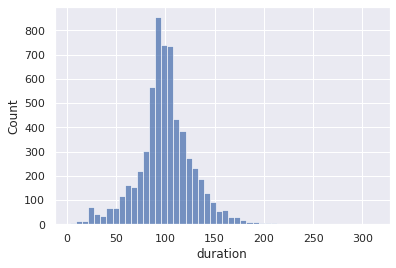

In [ ]:
sns.histplot(netflix_movie['duration'], bins=50)

In [ ]:
netflix_movie['duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

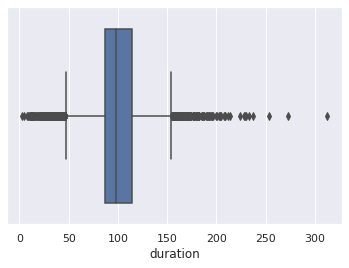

In [ ]:
sns.boxplot(x=netflix_movie['duration'])

In [ ]:
from scipy import stats

k2, p = stats.normaltest(netflix_movie['duration'])
p

7.621223665605874e-82

In [ ]:
stats.kstest(netflix_movie['duration'], 'norm', alternative='two-sided')

KstestResult(statistic=0.999836527969838, pvalue=0.0)

> # **Проверить является ли это распределение нормальным, подсчитать среднее, дисперсию и тд.**

